Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Gradient Boosting Evaluation
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]
ROC AUC Score 0.7303030303030302


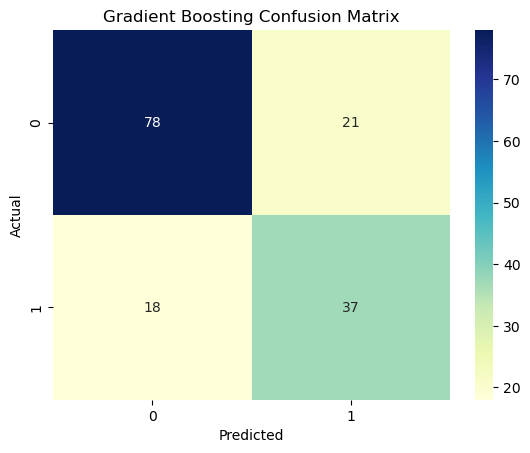

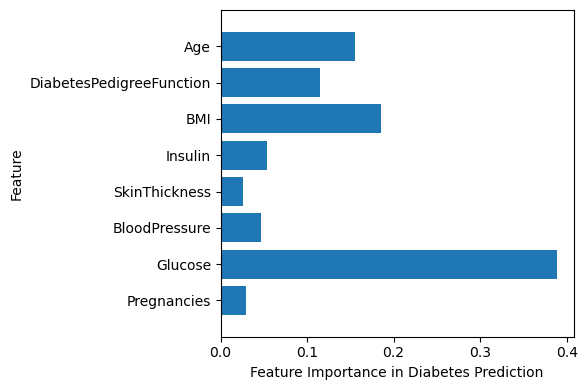

In [8]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

df = pd.read_csv('diabetes.csv')
df.head()

# Step 3: Check for missing values
print(df.isnull().sum())

# Step 4: Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the Decision Tree Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Step 8: Make Predictions
gb_pred = gb_model.predict(X_test_scaled)
gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Step 9: Evaluate the model
print("Gradient Boosting Evaluation")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("ROC AUC Score", roc_auc_score(y_test, gb_pred))

# Step 10: Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Step 11: Visualize the decision tree
def plot_feature_importances_diabetes(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(6, 4))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance in Diabetes Prediction")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.tight_layout()
    plt.show()
    
plot_feature_importances_diabetes(gb_model, X.columns)
             

             
